In [12]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import GRU

In [13]:
csv = r"C:\Users\vudda\OneDrive\Desktop\features.zip"
Features = pd.read_csv(csv)

In [14]:
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,labels
0,-637.701233,104.299019,4.894947,20.494011,12.552954,2.851410,-6.633390,-4.091278,-10.423918,-6.406950,...,0.172893,-1.170210,-5.292450,-0.573319,1.019471,-3.492607,-3.468123,-1.214944,1.971239,male_calm
1,-596.908460,86.871936,9.470162,17.109819,11.198966,1.541056,-6.677264,-5.755428,-9.684472,-6.891256,...,0.033803,-1.986515,-5.103855,-1.253110,0.514896,-3.268317,-4.502895,0.167153,0.256732,male_calm
2,-698.086548,99.795929,1.892679,19.915264,7.532868,1.265761,-9.188656,-5.798194,-12.299710,-4.976400,...,-1.639542,-2.603761,-4.890347,-0.879222,-1.250208,-3.449960,-4.708529,-0.086224,-3.034044,male_calm
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-10.305976,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male_angry
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-4.088007,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male_angry


# One Hot Encoding and Scaling the data¶

In [15]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=24, shuffle=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

# Model Building

In [16]:
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(BatchNormalization())

model.add(GRU(256, return_sequences=True))

model.add(GRU(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='softmax'))

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 20, 2048)          12288     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 10, 2048)          0         
 g1D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 10, 2048)          8192      
 chNormalization)                                                
                                                                 
 conv1d_4 (Conv1D)           (None, 10, 1024)          10486784  
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 5, 1024)           0         
 g1D)                                                            
                                                      

# Callback

In [17]:
history = model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200


51/51 [==============================] - 37s 634ms/step - loss: 2.7655 - accuracy: 0.0892 - val_loss: 2.7685 - val_accuracy: 0.0843
Epoch 2/200
51/51 [==============================] - 32s 629ms/step - loss: 2.7084 - accuracy: 0.1120 - val_loss: 2.7624 - val_accuracy: 0.0935
Epoch 3/200
51/51 [==============================] - 32s 633ms/step - loss: 2.6691 - accuracy: 0.1324 - val_loss: 2.7604 - val_accuracy: 0.0778
Epoch 4/200
51/51 [==============================] - 32s 624ms/step - loss: 2.6074 - accuracy: 0.1525 - val_loss: 2.7494 - val_accuracy: 0.0815
Epoch 5/200
51/51 [==============================] - 35s 692ms/step - loss: 2.5523 - accuracy: 0.1586 - val_loss: 2.7142 - val_accuracy: 0.1250
Epoch 6/200
51/51 [==============================] - 33s 655ms/step - loss: 2.4884 - accuracy: 0.1833 - val_loss: 2.6803 - val_accuracy: 0.1426
Epoch 7/200
51/51 [==============================] - 33s 640ms/step - loss: 2.4280 - accuracy: 0.2077 - val_loss: 2.6483 - val_accurac

51/51 [==============================] - 30s 593ms/step - loss: 0.1783 - accuracy: 0.9460 - val_loss: 1.1423 - val_accuracy: 0.8046
Epoch 111/200
51/51 [==============================] - 30s 591ms/step - loss: 0.1578 - accuracy: 0.9497 - val_loss: 1.1922 - val_accuracy: 0.8120
Epoch 112/200
51/51 [==============================] - 32s 628ms/step - loss: 0.1656 - accuracy: 0.9454 - val_loss: 1.2755 - val_accuracy: 0.7926
Epoch 113/200
51/51 [==============================] - 30s 585ms/step - loss: 0.1803 - accuracy: 0.9463 - val_loss: 1.5051 - val_accuracy: 0.7796
Epoch 114/200
51/51 [==============================] - 30s 591ms/step - loss: 0.2415 - accuracy: 0.9367 - val_loss: 1.4646 - val_accuracy: 0.7685
Epoch 115/200
51/51 [==============================] - 31s 605ms/step - loss: 0.2157 - accuracy: 0.9349 - val_loss: 1.2737 - val_accuracy: 0.7778
Epoch 116/200
51/51 [==============================] - 29s 572ms/step - loss: 0.1682 - accuracy: 0.9500 - val_loss: 1.1767 - val_accuracy:

In [18]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

34/34 [==============================] - 2s 58ms/step - loss: 1.8108 - accuracy: 0.7963
Accuracy of our model on test data :  79.62962985038757 %


# Plotting train and test loss and accuracy

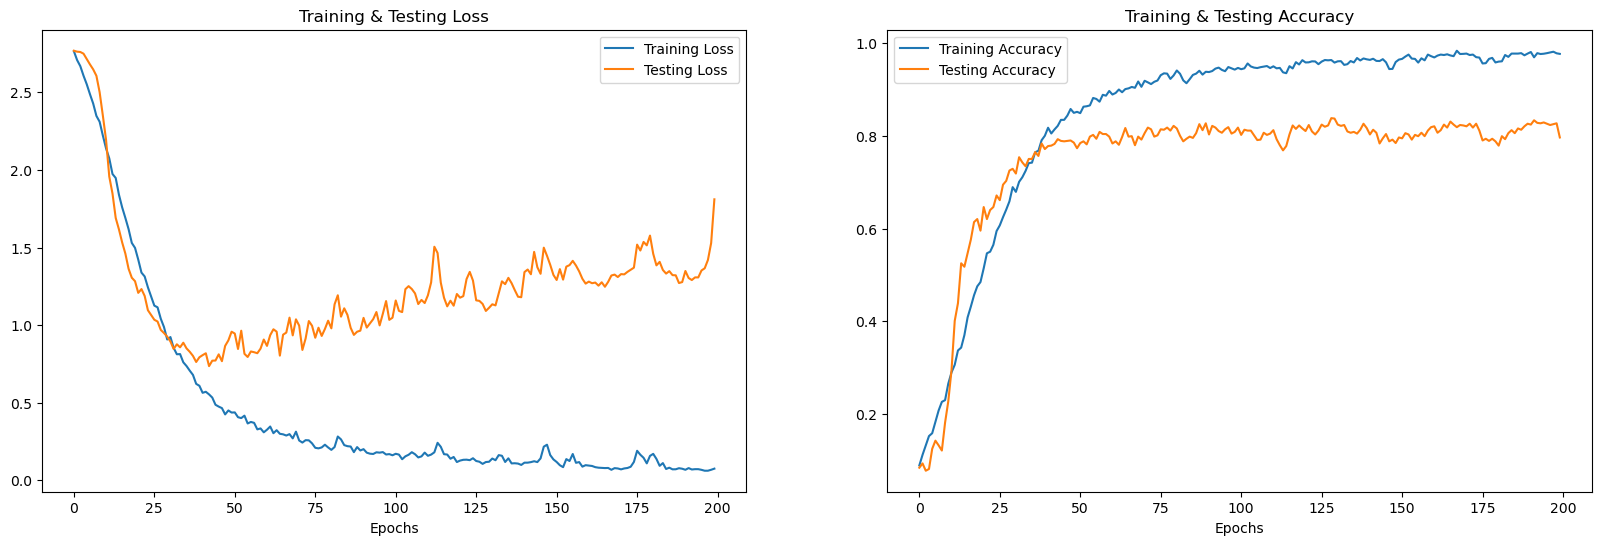

In [19]:
epochs = [i for i in range(200)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [20]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

34/34 [==============================] - 3s 54ms/step


,Predicted Labels,Actual Labels
0,female_fear,female_fear
1,female_calm,female_calm
2,male_fear,male_fear
3,female_surprise,female_surprise
4,female_happy,female_happy
5,male_disgust,male_disgust
6,male_fear,male_fear
7,female_fear,female_fear
8,female_sad,female_surprise
9,male_surprise,male_surprise


# Confusion matrix

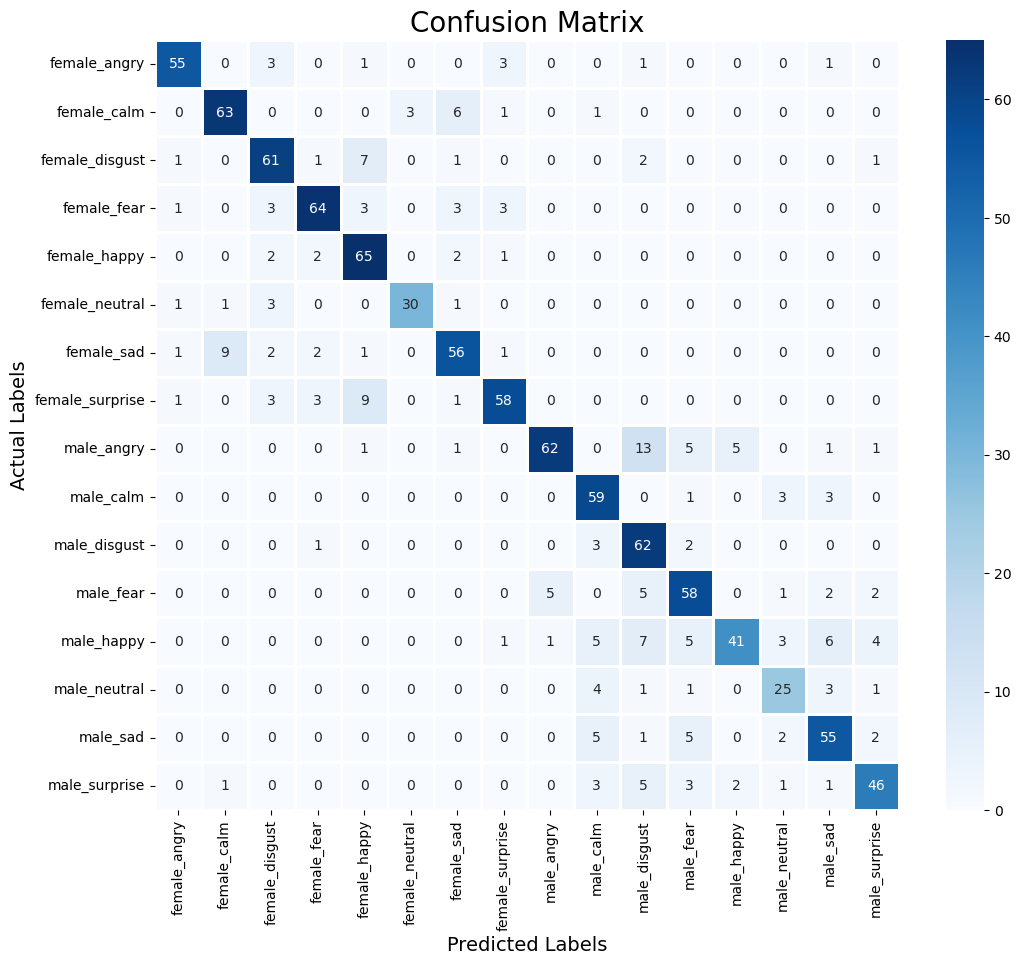

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()